<a href="https://colab.research.google.com/github/deltorobarba/machinelearning/blob/master/whitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelling & Analyzing (Gaussian) White Noise Processes**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **Relevance of White Noise**

* White noise is not necessarily noise with a Gaussian amplitude distribution
* the term 'white' refers to the way the signal power is distributed (i.e., independently) over time or among frequencies
* Gaussianity refers to the probability distribution with respect to the value, in this context the probability of the signal falling within any particular range of amplitudes
* White noise is the generalized mean-square derivative of the Wiener process or Brownian motion (so Wiener is an integrated White Noise)
* A random vector (that is, a partially indeterminate process that produces vectors of real numbers) is said to be a white noise vector or white random vector if its components each have a probability distribution with zero mean and finite variance, and are statistically independent: that is, their joint probability distribution must be the product of the distributions of the individual components.

For the demonstration of data analysis as first important step before model building, white noise processes have some desirable properties, which makes it clearer and easier to understand:

**A white noise process has following conditions**

* Mean (level) is zero (does not change over time - stationary process)
* Variance is constant (does not change over time - stationary process)
* Zero autocorrelation (values do not correlate with lag values)

**What is a White Noise Time Series?**

* A time series is white noise if the variables are independent and identically distributed with a mean of zero.
* This means that all variables have the same variance (sigma^2) and each value has a zero correlation with all other values in the series.
* If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise (There is of course not only Gaussian white noise processes, but also Levy etc.)

**White noise is an important concept in time series analysis and forecasting**

* **Predictability**: If your time series is white noise, then, by definition, it is random. You cannot reasonably model it and make predictions.
* **Model Diagnostics**: The statistics and diagnostic plots can be uses on time series to check if it is white noise. The series of errors from a time series forecast model should ideally be white noise. If the series of forecast errors are not white noise, it suggests improvements could be made to the predictive model. 

Time series data are expected to contain some white noise component on top of the signal generated by the underlying process. For example:

y(t) = signal(t) + noise(t)

* Once predictions have been made by a time series forecast model, they can be collected and analyzed. The series of forecast errors should ideally be white noise.
* When forecast errors are white noise, it means that all of the signal information in the time series has been harnessed by the model in order to make predictions. All that is left is the random fluctuations that cannot be modeled.
* A sign that model predictions are not white noise is an indication that further improvements to the forecast model may be possible.


## **Create (Gaussian) White Noise**

In [0]:
# Set seed for reproducibility and hyperparameter

from random import gauss
from random import seed
from pandas import Series

seed(1)
mean = 0.0
sigma = 1.0
periods = 5000

# Create White Noise
whitenoise = [gauss(mean, sigma) for i in range(periods)]
whitenoise = pd.DataFrame(data=Series(whitenoise), columns=['whitenoise'])

# Create Time Series
ts = pd.date_range('2010-01-01', periods=periods, freq='D')
ts = pd.DataFrame(data=ts, columns=['ts'])

# Merge and Set Index
series = pd.concat([ts, whitenoise], axis=1).set_index('ts')
series.head()

,whitenoise
ts,
2010-01-01,1.288185
2010-01-02,1.449446
2010-01-03,0.066336
2010-01-04,-0.764544
2010-01-05,-1.092173


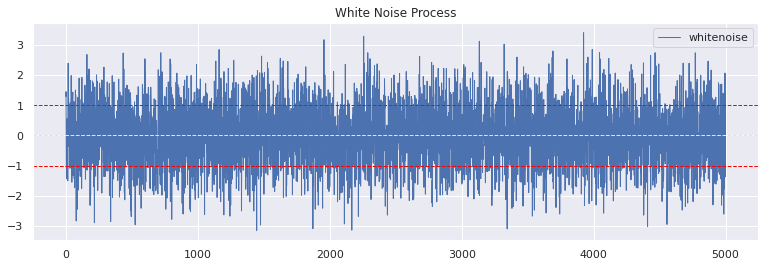

In [0]:
# Visualize Series
sns.set(rc={'figure.figsize':(13, 4), "lines.linewidth": 1.0})
whitenoise.plot(title='White Noise Process')
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=-1, color='red', linestyle='--', linewidth=1.0)
plt.axhline(y=0, color='yellow', linestyle='--', linewidth=1.0)

## **Distribution**

In [0]:
series.describe(percentiles=[0.05, 0.95])

,whitenoise
count,5000.000000
mean,-0.000236
std,0.991748
min,-3.149965
5%,-1.663347
50%,-0.006930
95%,1.656811
max,3.400552


Mean is nearly 0.0 and the standard deviation is nearly 1.0. Some variance is expected given the small size of the sample. If we had more data, it might be more interesting to split the series in half and calculate and compare the summary statistics for each half. We would expect to see a similar mean and standard deviation for each sub-series.

In [0]:
# First central moment: Mean
series.mean()

whitenoise   -0.000236
dtype: float64

In [0]:
# Second central moment: Variance
series.var()

whitenoise    0.983565
dtype: float64

In [0]:
# Third central moment: Skewness ('Higher moment')
series.skew()

whitenoise   -0.001609
dtype: float64

In [0]:
# Forth central moment: Kurtosis ('Higher moment')
series.kurt()

whitenoise   -0.090712
dtype: float64

In [0]:
# Compute specific percentiles
series.quantile(0.75)

whitenoise    0.667429
Name: 0.75, dtype: float64

**Distribution Plot**

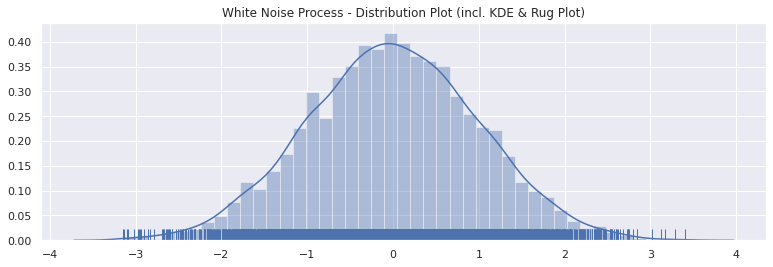

In [0]:
sns.set(rc={'figure.figsize':(13, 4)})
sns.distplot((series), hist=True, rug=True).set_title('White Noise Process - Distribution Plot (incl. KDE & Rug Plot)')
plt.show()

**Boxplot**

Text(0.5, 1.0, 'White Noise Process - Boxplot')

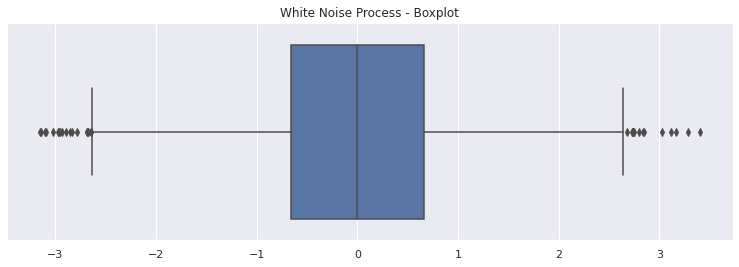

In [0]:
sns.boxplot(series).set_title('White Noise Process - Boxplot')

**QQ Plot**

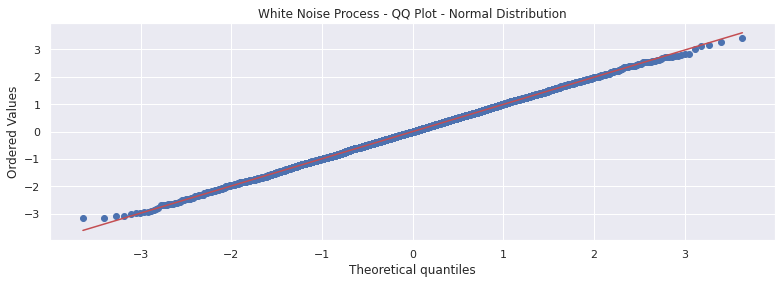

In [0]:
import scipy
from scipy import stats
stats.probplot(series.whitenoise, dist="norm", plot=plt)
plt.title('White Noise Process - QQ Plot - Normal Distribution')
plt.show()

**Statistical Tests (Goodness of Fit)**

In [0]:
# Normal Test. H0: sample comes from a normal distribution
import scipy
from scipy import stats
stats.normaltest(series)

NormaltestResult(statistic=array([1.7988695]), pvalue=array([0.40679954]))

In [0]:
# Shapiro–Wilk Test. H0: data was drawn from a normal distribution
# Determine number of lags based on periods in time series for Ljung-Box test:
# Formula: (Lags = (Number of Observations / 2) -2): "np.int_((periods/2)-2)"
import scipy
from scipy import stats
stats.shapiro(series.whitenoise)

(0.9996960163116455, 0.6947302222251892)

In [0]:
# Jarque-Bera Test. H0: sample is normal distributed
import scipy
from scipy import stats
stats.jarque_bera(series)

(1.7586207168611774, 0.41506906187895287)

All P-values > 0.05. Don't reject any HO. Distribution is normal

## **Autocorrelation**

**Autocorrelation Plot**

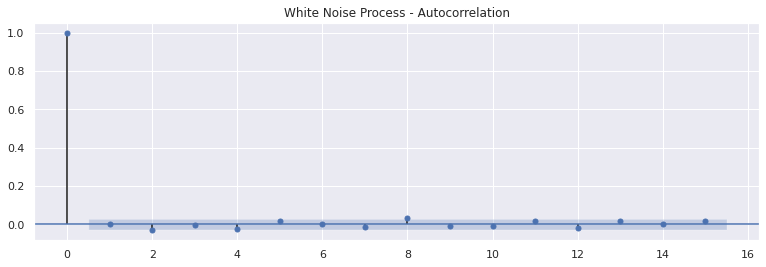

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series.squeeze(), lags=15)
plt.title('White Noise Process - Autocorrelation')
plt.show()

**Partial Autocorrelation Lag Plot**

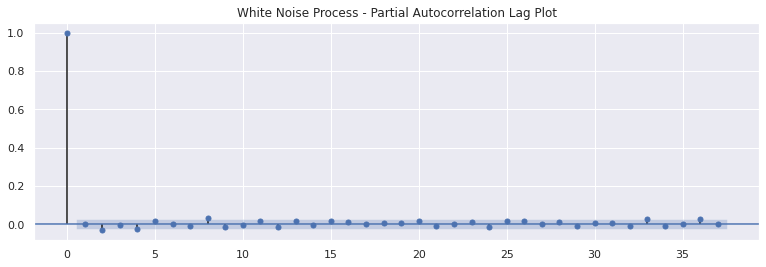

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.title('White Noise Process - Partial Autocorrelation Lag Plot')
plt.show()

**Lag Plot**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


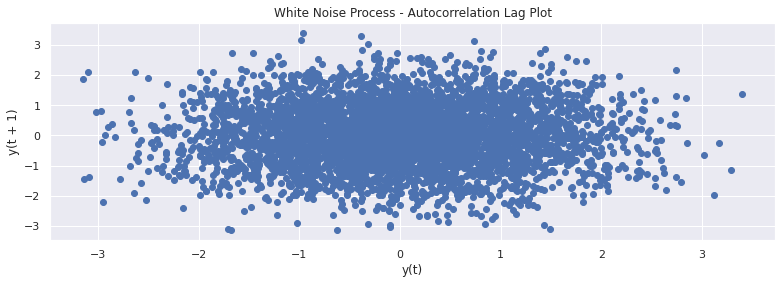

In [0]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.title('White Noise Process - Autocorrelation Lag Plot')
plt.show()

**Statistical Tests**

In [0]:
# Durban-Watson Statistic. Value 2: no serial correlation. 0: positive correlation. 4: negative correlation
import statsmodels.api as sm
import statsmodels.tsa.stattools
statsmodels.stats.stattools.durbin_watson(series, axis=0)

array([1.99873153])

In [0]:
# Ljung-Box test of autocorrelation in residuals. H0: independence in a given time series
import statsmodels.api as sm
sm.stats.acorr_ljungbox(series.whitenoise, lags=[(np.int_((periods/2)-2))])

(array([2360.64190127]), array([0.97561779]))

In [0]:
# BDS Independence Test. H0: Time Series is IID
import statsmodels.api as sm
sm.tsa.stattools.bds(series.whitenoise, max_dim=6, epsilon=None, distance=1.5)

(array([2.20528503, 1.79865181, 1.73497756, 1.50245135, 1.06946712]),
 array([0.0274341 , 0.07207378, 0.08274478, 0.13298058, 0.28485924]))

## **Stationarity**

**Trend & Seasonality Plots**

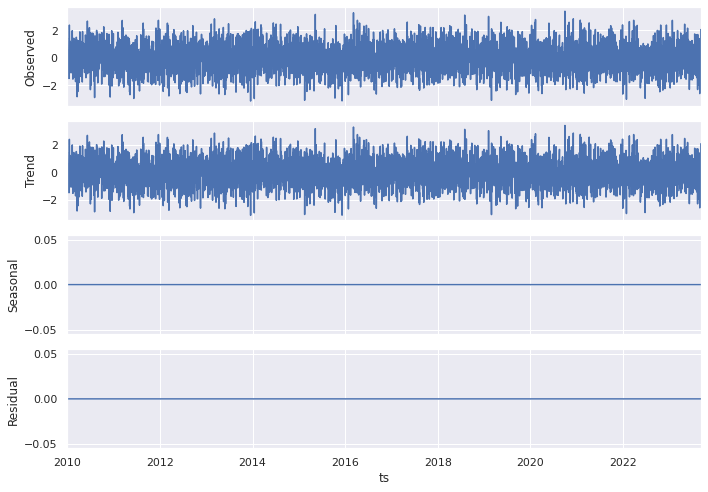

In [0]:
# Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
sns.set(rc={'figure.figsize':(10, 7)})
decompose = series
result = seasonal_decompose(decompose, model='additive', freq=1) # or multiplicative
result.plot()
plt.show()

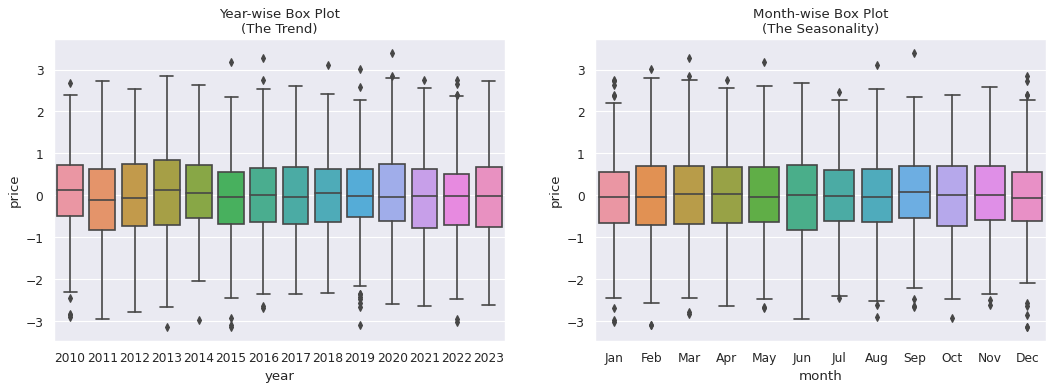

In [0]:
# Import Data
seasonal_plots = series.copy()

# Transform Series
seasonal_plots.reset_index(inplace=True)
seasonal_plots = seasonal_plots.rename(columns={"ts": "date", "whitenoise" : "price"})

# Prepare Data
seasonal_plots['year'] = [d.year for d in seasonal_plots.date]
seasonal_plots['month'] = [d.strftime('%b') for d in seasonal_plots.date]
years = seasonal_plots['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi= 80)
sns.boxplot(x='year', y='price', data=seasonal_plots, ax=axes[0])
sns.boxplot(x='month', y='price', data=seasonal_plots.loc[~seasonal_plots.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)

plt.show()

**Augmented Dickey Fuller Test**

In [0]:
# Augmented Dickey Fuller. H0: There is a unit root for the series (non stationary)
from statsmodels.tsa.stattools import adfuller
adfuller(series.whitenoise, maxlag=None, regression='ctt', autolag='AIC', store=False, regresults=False)

(-51.655529537354894,
 0.0,
 1,
 4998,
 {'1%': -4.373450004009452,
  '10%': -3.553992425283714,
  '5%': -3.8335721135923864},
 14024.439778510303)

**KPSS - Level & Trend Stationarity Test**

In [0]:
# KPSS - Level Stationarity Test. H0 = Stationary (Stochastic Trend). H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='c', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.09474034815631913,
 0.1,
 6,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [0]:
# KPSS - Trend Stationary Test. H0 = Deterministic Trend. H1 = Non-Stationary (Unit Root)
import statsmodels.tsa.stattools
statsmodels.tsa.stattools.kpss(series.whitenoise, regression='ct', lags='auto', store=False)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.049288217112185145,
 0.1,
 6,
 {'1%': 0.216, '10%': 0.119, '2.5%': 0.176, '5%': 0.146})